# Introduction to Perceptron

A perceptron is a type of artificial neural network invented in 1957. It is the simplest form of a neural network used for binary classification tasks (classifying data into one of two categories). It models the decision-making process similar to a neuron in the brain, which makes it an essential model for understanding the basics of supervised learning.

## Basic Structure

The structure of a perceptron is straightforward: it consists of input nodes (or neurons), weights, a bias, and an activation function. Each input feature is associated with a weight, and these are adjusted during the learning process. The bias is an additional parameter in the perceptron that adjusts the output along with the weighted sum of the inputs to better fit the model to the data. The structure is visualized as follows:

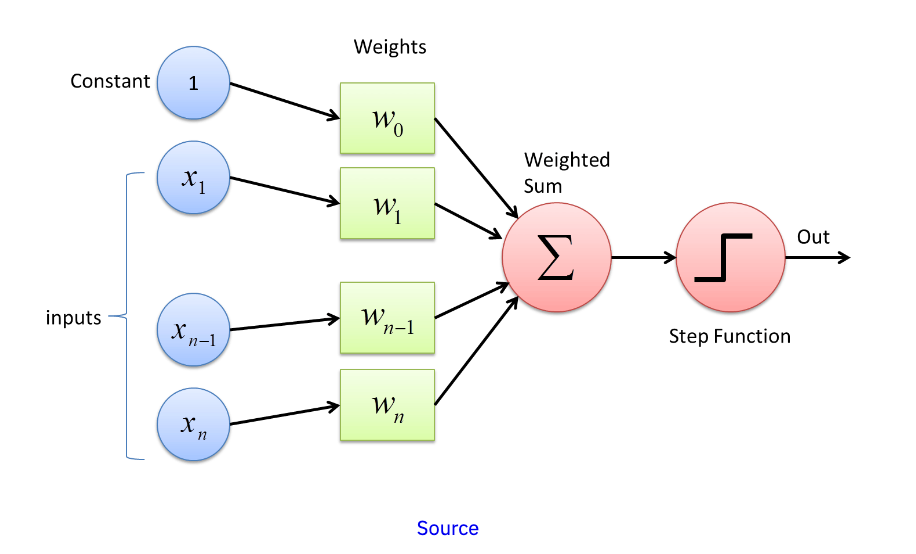

The perceptron computes a weighted sum of the inputs, adds a bias, and passes this sum through an activation function to produce an output. The equations involved are:

**Given:**
- $\mathbf{x}$: input vector with bias
- $\mathbf{w}$: weight vector including bias weight

**Equation:**
$$
z = \mathbf{w}^T \mathbf{x}
$$

where z is the preactivation value. The output is determined by applying a sign function to z.

## Learning Process

The perceptron updates its weights based on the errors made in predictions during training. Here's the basic process:

- Initialize weights and bias to small random values.
- For each training sample, compute the output.
- Compare the predicted output to the actual label.
- Update the weights and bias if there is an error, using these formulas:

**Cost Function:**
$$
\text{Cost} = \frac{1}{N} \sum_{i=1}^{N} (y_i - y_i^*)^2
$$

where $ y_i $ is the predicted output and $ y_i^* $ is the actual output. The update rule for the weights is:

**Weight Function:**
$$
w_i = w_i + \eta (y - \hat{y}) x_i
$$
where $ w_i $ is the weight, η is the learning rate, y is the true label, $ \hat{y} $ is the predicted label, and $ x_i $ is the input value.

## Limitations

Linear Separability: The perceptron algorithm only works when the dataset is linearly separable — meaning the two classes can be separated with a single straight line.

Convergence: It will not converge if the data is not linearly separable, leading to infinite looping or stopping after a set number of iterations without a satisfactory solution.

## Implementation
I will now implement the Perceptron model to predict whether a given banknote (currency note) is genuine or forged. It is based on images taken from both genuine and forged banknotes. 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [14]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

y = y.values
y = y.ravel()

Here, the X matrix represents the x values, also known as input matrix. The y vector represents the real target values (genuine or forged) corresponding the the inputs.

In [15]:
# Find indices of all 0s and 1s in the array y.
indices_0 = np.where(y == 0)[0]
indices_1 = np.where(y == 1)[0]

# Shuffle these indices to randomize data selection.
np.random.shuffle(indices_0)
np.random.shuffle(indices_1)

# Select the first 50 indices from both shuffled lists for a balanced dataset.
selected_indices_0 = indices_0[:50]
selected_indices_1 = indices_1[:50]

# Combine these selected indices into one array.
final_indices = np.concatenate([selected_indices_0, selected_indices_1])

# Use the final indices to select a balanced dataset from y.
y = y[final_indices]

# Convert labels in y: 0 becomes -1 and 1 remains 1.
y = np.where(y == 0, -1, 1)


The code above examines the target values and creates a subset of 50 'genuine' and 50 'forged' instances.

In [ ]:
X = X[['variance', 'skewness']].values
X = X[final_indices]

X has been adjusted to contain the input features of the same 100 instances, except the only features we will be training on are 'Variance' and 'Skewness'.

In [17]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            print(f"epoch: {epoch}, errors: {errors}")
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Create an instance of the Perceptron class with 20000 training epochs and a learning rate of 0.1.
percep = Perceptron(epochs = 20000, eta = 0.1)

# Train the perceptron using the input features X and target labels y.
percep.train(X, y)

# After training, retrieve the number of misclassifications (errors) in each epoch.
errors = percep.errors_

We have finished training our model, and can now evaluate its performance

In [19]:
y_hat = percep.predict(X)

print(y == y_hat)

[ True  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


Here we examine which instances our perceptron predicted correctly (True) vs incorrectly (False)

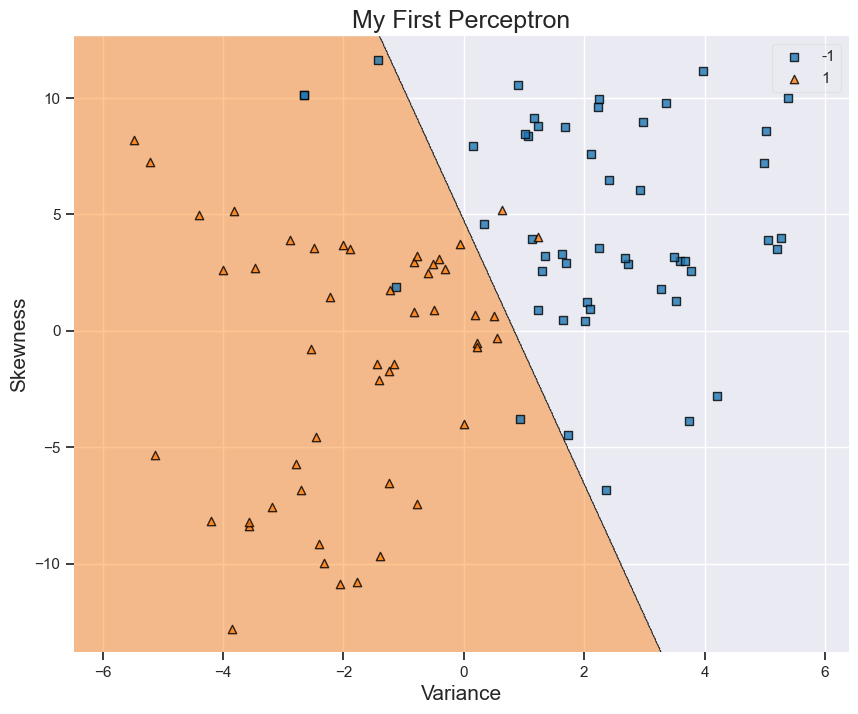

In [20]:
plt.figure(figsize = (10, 8))
# Plot decision regions using the trained perceptron.
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.show()

From the output shown above, it's evident that we've successfully identified a linear separator that has effectively classified our data. When we defined our Perceptron class, we included a feature to track the model's errors at each iteration within an epoch, storing this information in the errors_ attribute. To examine the progression of these errors across each epoch, you can execute the following code in the cell below.

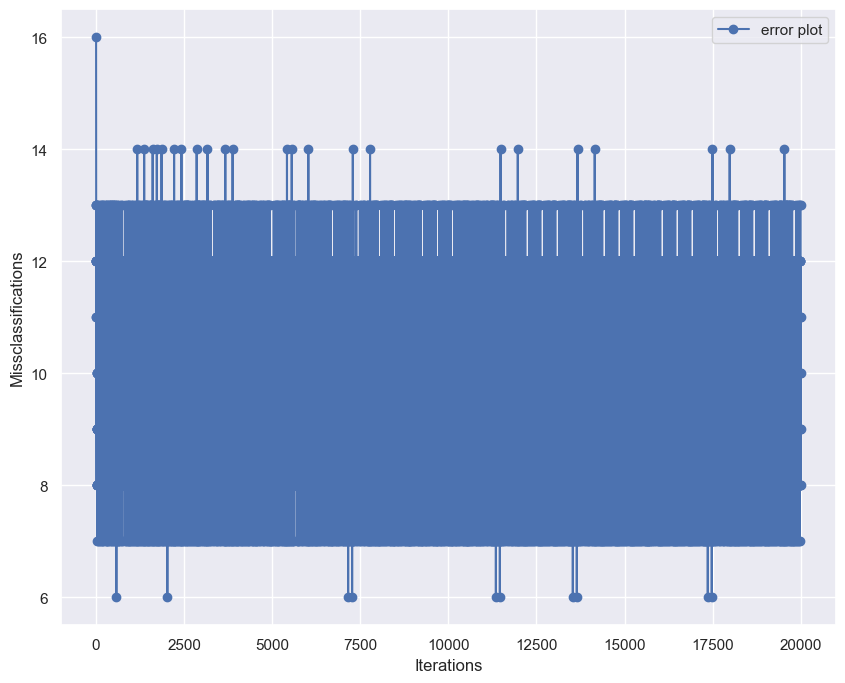

In [22]:
plt.figure(figsize=(10, 8))

# Plot the number of misclassifications per iteration using data from `percep.errors_`.
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, marker='o', label='Error Plot')

# Label the x-axis as 'Iterations' and the y-axis as 'Misclassifications'.
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.legend()
plt.show()


In [23]:
y_pred = percep.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)

print('Test Accuracy:', accuracy)

Test Accuracy: 0.93


In [24]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[45  5]
 [ 2 48]]


## Conclusion

The graph that tracks the perceptron's errors across different epochs reveals a plateau in its learning curve, suggesting a maximum threshold for its data-fitting capability. This can be interpreted in two distinct ways:

- The perceptron tends to prevent overfitting, suggesting it maintains a good level of generalization.
- It lacks the complexity to fully capture and model complex data patterns.

Despite these constraints, the perceptron's performance on test data was impressive, showing its ability as a simple yet effective tool. 